# PYTHON FOR DS PROJECT 1
### LOAD AND EXPLORE DATA
#### 1. Import the Required libraries and Read the dataset

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import re
%matplotlib inline


In [144]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
fifa_df = pd.read_csv('/Users/91789/Downloads/Dataset and relavant files - Python Project 1 (1)/fifa.csv')
fifa_df.head(5)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


#### 2. Check the first few samples, shape, info of the data and familiarize yourself with different features.

In [27]:
# Copying the original dataframe into another dataframe to perform various operations
fifa_var_df = fifa_df.copy()

In [28]:
# 5 random samples from the given dataset
fifa_var_df.sample(5)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
10948,235514,S. Al Rubaie,24,https://cdn.sofifa.org/players/4/19/235514.png,Saudi Arabia,https://cdn.sofifa.org/flags/183.png,65,71,Ettifaq FC,https://cdn.sofifa.org/teams/2/light/112096.png,...,58.0,63.0,66.0,64.0,9.0,6.0,8.0,9.0,8.0,€1.2M
17689,216262,M. Urwin,24,https://cdn.sofifa.org/players/4/19/216262.png,England,https://cdn.sofifa.org/flags/14.png,53,58,Fleetwood Town,https://cdn.sofifa.org/teams/2/light/112260.png,...,33.0,28.0,20.0,21.0,55.0,45.0,51.0,53.0,58.0,€110K
3857,238555,J. Savarino,21,https://cdn.sofifa.org/players/4/19/238555.png,Venezuela,https://cdn.sofifa.org/flags/61.png,72,82,Real Salt Lake,https://cdn.sofifa.org/teams/2/light/111065.png,...,70.0,36.0,42.0,30.0,7.0,13.0,6.0,15.0,12.0,€8.5M
16354,199480,P. O'Conor,30,https://cdn.sofifa.org/players/4/19/199480.png,Republic of Ireland,https://cdn.sofifa.org/flags/25.png,57,57,Bray Wanderers,https://cdn.sofifa.org/teams/2/light/838.png,...,54.0,36.0,53.0,53.0,7.0,6.0,11.0,16.0,15.0,€155K
14695,239889,R. Gül,17,https://cdn.sofifa.org/players/4/19/239889.png,Turkey,https://cdn.sofifa.org/flags/48.png,60,77,Galatasaray SK,https://cdn.sofifa.org/teams/2/light/325.png,...,50.0,31.0,30.0,30.0,13.0,7.0,12.0,7.0,9.0,€1M


In [29]:
# Shape of the dataset
fifa_var_df.shape

(18207, 60)

In [30]:
# Information about the dataset
fifa_var_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

In [31]:
#Description of dataset
fifa_var_df.describe()

,ID,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [32]:
# Checking the data for duplicate records
len(fifa_var_df[fifa_var_df.duplicated()])

0

In [33]:
#Percentage of null values in different columns of the dataset
fifa_var_df.isnull().sum()/len(fifa_var_df) * 100

ID                           0.000000
Name                         0.000000
Age                          0.000000
Photo                        0.000000
Nationality                  0.000000
Flag                         0.000000
Overall                      0.000000
Potential                    0.000000
Club                         1.323667
Club Logo                    0.000000
Value                        0.000000
Wage                         0.000000
Preferred Foot               0.263635
International Reputation     0.263635
Weak Foot                    0.263635
Skill Moves                  0.263635
Work Rate                    0.263635
Body Type                    0.263635
Position                     0.329544
Jersey Number                0.329544
Joined                       8.529686
Loaned From                 93.057615
Contract Valid Until         1.587302
Height                       0.263635
Weight                       0.263635
Crossing                     0.263635
Finishing   

#### 3. Dropping the column which is having rendundant data for Analysis

In [34]:
# Columns like 'Photo', 'Flag, 'Club Logo' are been dropped
# Loaned from column is 93% null, so we can drop off.
fifa_var_df.drop(['Loaned From', 'Photo','Club Logo', 'Flag'], axis =1 , inplace =True)

In [35]:
# Information about the dataset
fifa_var_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     18207 non-null  object 
 8   Wage                      18207 non-null  object 
 9   Preferred Foot            18159 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Weak Foot                 18159 non-null  float64
 12  Skill Moves               18159 non-null  float64
 13  Work Rate                 18159 non-null  object 
 14  Body T

In [36]:
# Shape of dataframe after removing unmanted columns
fifa_var_df.shape

(18207, 56)

### DATA CLEANSING AND PRE-PROCESSING
#### 4. Convert columns 'VALUE', 'WAGE', 'RELEASE CLAUSE' to Float Datatypes and get rid of currency symbols and suffix.

In [37]:
# inspect the dataframe
fifa_var_df[['Value','Wage','Release Clause']]

,Value,Wage,Release Clause
0,€110.5M,€565K,€226.5M
1,€77M,€405K,€127.1M
2,€118.5M,€290K,€228.1M
3,€72M,€260K,€138.6M
4,€102M,€355K,€196.4M
...,...,...,...
18202,€60K,€1K,€143K
18203,€60K,€1K,€113K
18204,€60K,€1K,€165K
18205,€60K,€1K,€143K


In [38]:
# Function making the necessary changes on the currency columns
def transform_val(curr_val):
    num_value = re.findall(r"(\d+\.\d*|\d+)", curr_val)
    nv = num_value[0]
    if 'M' in curr_val:
        nv = float(nv)*1000000
    elif 'K' in curr_val:
        nv =float(nv)* 1000
    return nv

In [39]:
fifa_var_df['Value'] = fifa_var_df['Value'].apply(transform_val)
fifa_var_df['Wage'] = fifa_var_df['Wage'].apply(transform_val)

In [42]:
fifa_var_df['Release Clause'] = fifa_var_df['Release Clause'].apply(lambda x: transform_val(x) if (not (x !=x) and (x!=None)
                                                                                                 and pd.notnull(x)) else x)

In [43]:
fifa_var_df[['Value','Wage','Release Clause']].head(5)

,Value,Wage,Release Clause
0,110500000.0,565000.0,226500000.0
1,77000000.0,405000.0,127100000.0
2,118500000.0,290000.0,228100000.0
3,72000000.0,260000.0,138600000.0
4,102000000.0,355000.0,196400000.0


#### 5. Convert the Column "JOINED" into integer datatype keeping only the year.

In [46]:
#inspect 'Joined' column
fifa_var_df['Joined'].head(5)

0     Jul 1, 2004
1    Jul 10, 2018
2     Aug 3, 2017
3     Jul 1, 2011
4    Aug 30, 2015
Name: Joined, dtype: object

In [53]:
# taking only the year from 'JOINED' column
fifa_var_df['Joined'] = pd.DatetimeIndex(fifa_var_df['Joined']).year

In [69]:
# changing the datatype
fifa_var_df['Joined'] = fifa_var_df['Joined'].apply(lambda x: int(x) if (not (x!=x) and (x!=None) and pd.notnull(x)) else x)
fifa_var_df['Joined'] =pd.to_numeric(fifa_var_df['Joined']).fillna(0).astype(int)

In [70]:
#view the joined column
fifa_var_df['Joined'].head(5)

0    1970
1    1970
2    1970
3    1970
4    1970
Name: Joined, dtype: int32

#### 6. Convert the column "Contract Valid Untill" to pandas datetime type.

In [73]:
# inspecting the column's initial record
fifa_var_df['Contract Valid Until'].head(5)

0    2021
1    2022
2    2022
3    2020
4    2023
Name: Contract Valid Until, dtype: object

In [74]:
#changing the date as per pandas
fifa_var_df['Contract Valid Until'] = pd.to_datetime(fifa_var_df['Contract Valid Until'])

In [75]:
fifa_var_df['Contract Valid Until'].head(5)

0   2021-01-01
1   2022-01-01
2   2022-01-01
3   2020-01-01
4   2023-01-01
Name: Contract Valid Until, dtype: datetime64[ns]

#### 7. The column 'Height' is in inches with a quotation mark, Convert to float with decimal points.

In [76]:
fifa_var_df['Height'].head(5)

0     5'7
1     6'2
2     5'9
3     6'4
4    5'11
Name: Height, dtype: object

In [83]:
def replace_inch_dec(value):
    return str(value).replace("'",'.')

In [88]:
fifa_var_df['Height'] = fifa_var_df['Height'].apply(replace_inch_dec)


In [89]:
fifa_var_df['Height'] = fifa_var_df['Height'].replace('', np.nan).astype(float)

In [91]:
fifa_var_df['Height'].head(5)

0    5.70
1    6.20
2    5.90
3    6.40
4    5.11
Name: Height, dtype: float64

#### 8 .  The column "Weight" has the suffix as lbs, remove the suffix and convert to float.

In [92]:
# current view of weight
fifa_var_df['Weight'].head(5)

0    159lbs
1    183lbs
2    150lbs
3    168lbs
4    154lbs
Name: Weight, dtype: object

In [94]:
fifa_var_df['Weight'] = pd.to_numeric(fifa_var_df['Weight'].str.replace('lbs',''))

In [104]:
fifa_var_df['Weight'].head(5)

0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64

#### 9. Check for the percentage of missing values and impute them with appropriate imputation techniques.

In [102]:
# NOTE : lOANED FROM COLUMN was dropped before due to 93% null records
fifa_var_df.isnull().sum()/len(fifa_var_df) * 100

ID                          0.000000
Name                        0.000000
Age                         0.000000
Nationality                 0.000000
Overall                     0.000000
Potential                   0.000000
Club                        1.323667
Value                       0.000000
Wage                        0.000000
Preferred Foot              0.263635
International Reputation    0.263635
Weak Foot                   0.263635
Skill Moves                 0.263635
Work Rate                   0.263635
Body Type                   0.263635
Position                    0.329544
Jersey Number               0.329544
Joined                      0.000000
Contract Valid Until        1.587302
Height                      0.263635
Weight                      0.263635
Crossing                    0.263635
Finishing                   0.263635
HeadingAccuracy             0.263635
ShortPassing                0.263635
Volleys                     0.263635
Dribbling                   0.263635
C

In [137]:
# taking columns having null % greater than 0
for col in ['Preferred Foot','International Reputation','Weak Foot','Skill Moves','Work Rate','Body Type','Position','Jersey Number','Contract Valid Until','Height','Weight'
,'Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed'
,'Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking'
,'StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes','Release Clause']:
    fifa_var_df[col].fillna(fifa_var_df[col].mode()[0], inplace=True)

In [108]:
#Replacing Club column null values with No Club
fifa_var_df['Club'].fillna("No Club", inplace =True)

In [138]:
# Now Checking Missing Values %
fifa_var_df.isnull().sum()/len(fifa_var_df) * 100

ID                          0.0
Name                        0.0
Age                         0.0
Nationality                 0.0
Overall                     0.0
Potential                   0.0
Club                        0.0
Value                       0.0
Wage                        0.0
Preferred Foot              0.0
International Reputation    0.0
Weak Foot                   0.0
Skill Moves                 0.0
Work Rate                   0.0
Body Type                   0.0
Position                    0.0
Jersey Number               0.0
Joined                      0.0
Contract Valid Until        0.0
Height                      0.0
Weight                      0.0
Crossing                    0.0
Finishing                   0.0
HeadingAccuracy             0.0
ShortPassing                0.0
Volleys                     0.0
Dribbling                   0.0
Curve                       0.0
FKAccuracy                  0.0
LongPassing                 0.0
BallControl                 0.0
Accelera

#### 10. Plot the distribution of Overall rating for all the players and write your findings.

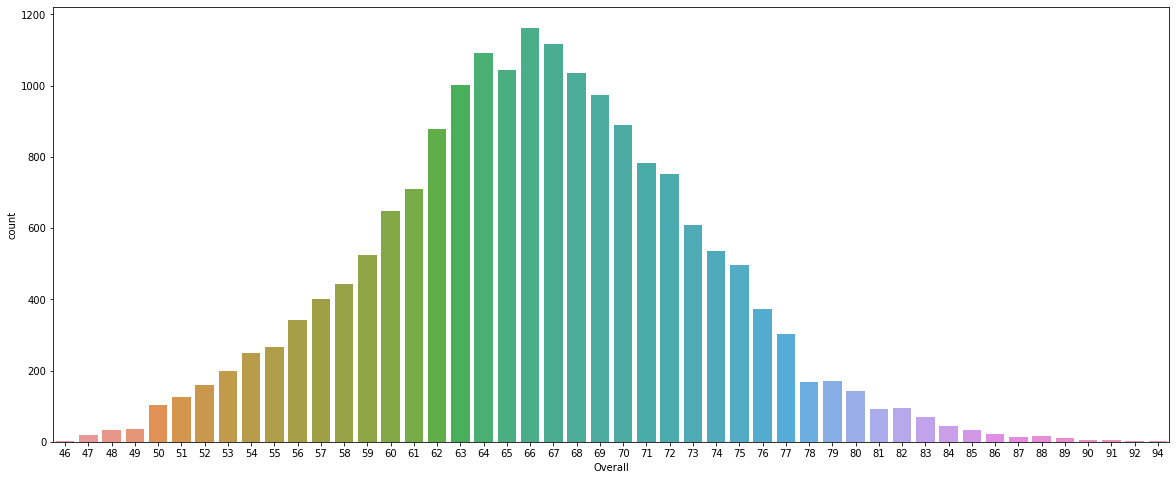

Mean:  66.23869940132916


In [145]:
plt.figure(figsize =(20,8))
sns.countplot(fifa_var_df['Overall'])
plt.show()
print('Mean: ',fifa_var_df['Overall'].mean())

### Mean of Overall Rating Comes out to be  66(rounded)

#### 11 . Name of Top 20 players based on Overall Rating

In [149]:
fifa_var_df.nlargest(20, ['Overall'])['Name']

0              L. Messi
1     Cristiano Ronaldo
2             Neymar Jr
3                De Gea
4          K. De Bruyne
5             E. Hazard
6             L. Modrić
7             L. Suárez
8          Sergio Ramos
9              J. Oblak
10       R. Lewandowski
11             T. Kroos
12             D. Godín
13          David Silva
14             N. Kanté
15            P. Dybala
16              H. Kane
17         A. Griezmann
18        M. ter Stegen
19          T. Courtois
Name: Name, dtype: object

#### 12. Generate a dataframe which should include all the information of the Top 20 players based on the Overall rating.

In [151]:
fifa_top20 = fifa_var_df.nlargest(20, ['Overall'])
fifa_top20

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,Right,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,80000000.0,455000.0,Right,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,164000000.0
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,Right,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
9,200389,J. Oblak,25,Slovenia,90,93,Atlético Madrid,68000000.0,94000.0,Right,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,144500000.0


#### 13. What is the average "Age" and "Wage" of these top 20 players?(Use the data frame created in the question 11)

In [153]:
avg_age = fifa_top20['Age'].mean()
avg_wage = fifa_top20['Wage'].mean()

print('Average Age of Top 20 Players is: ',avg_age)
print('Average Wage of Top 20 Players is: ',avg_wage)

Average Age of Top 20 Players is:  28.3
Average Wage of Top 20 Players is:  289700.0


#### 14. Among the top 20 players based on the Overall rating, which player has the highest wage? Display the name of the player with his wage.

In [163]:
maxWage = fifa_top20['Wage'].max()
print("The player with maximum Wage is mentioned below: ")
fifa_top20[fifa_top20['Wage']== maxWage][['Name','Wage']]

The player with maximum Wage is mentioned below: 


,Name,Wage
0,L. Messi,565000.0


#### 15. Generate a dataframe which should include the "Player name", "Club Name", "Wage", and 'Overall rating'.
   ##### i) find the average Overall rating for each club.
   ##### ii) Display the average overall rating of Top10 Clubs using a plot

In [164]:
fifa_var_df_Club = fifa_var_df[['Name','Club','Wage','Overall']]

In [167]:
#avg. rating for each club
fifa_var_df_Club.groupby(['Club'])['Overall'].agg('mean')

Club
 SSV Jahn Regensburg     65.586207
1. FC Heidenheim 1846    65.750000
1. FC Kaiserslautern     63.384615
1. FC Köln               70.785714
1. FC Magdeburg          65.615385
                           ...    
Zagłębie Sosnowiec       60.760000
Çaykur Rizespor          66.900000
Örebro SK                60.481481
Östersunds FK            63.545455
Śląsk Wrocław            62.200000
Name: Overall, Length: 652, dtype: float64

<AxesSubplot:xlabel='Club'>

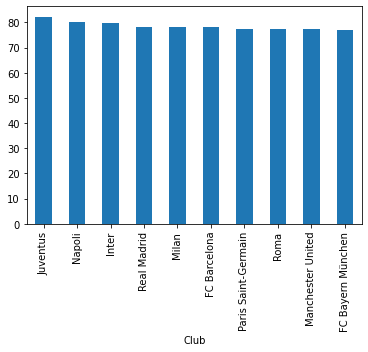

In [169]:
# bargraph for top 10 players
fifa_var_df_top10 = fifa_var_df_Club.groupby(['Club'])['Overall'].agg('mean').sort_values(ascending=False).head(10)
fifa_var_df_top10.plot.bar()

#### 16. What is the relationship between age and individual potential of the player? Visualize the relationship with appropriate plot and Comment on the same.

In [170]:
fifa_var_df['Age'].corr(fifa_var_df['Potential'])

-0.2533121074109556

<Figure size 1440x1440 with 0 Axes>

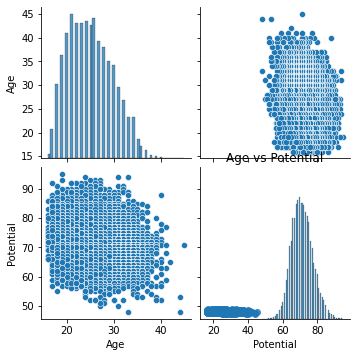

In [175]:
plt.figure(figsize=(20, 20))
sns.pairplot(fifa_var_df[['Age','Potential']])
sns.regplot(fifa_df['Age'] , fifa_df['Potential'])
plt.title('Age vs Potential')
plt.show()

### In General, Potential decreases as age increases after the Age of 30 years, also there is negative correlation between age and potential

#### 17 . Which features directly contribute to the wages of the players? Support your answer with a plot and a metric.

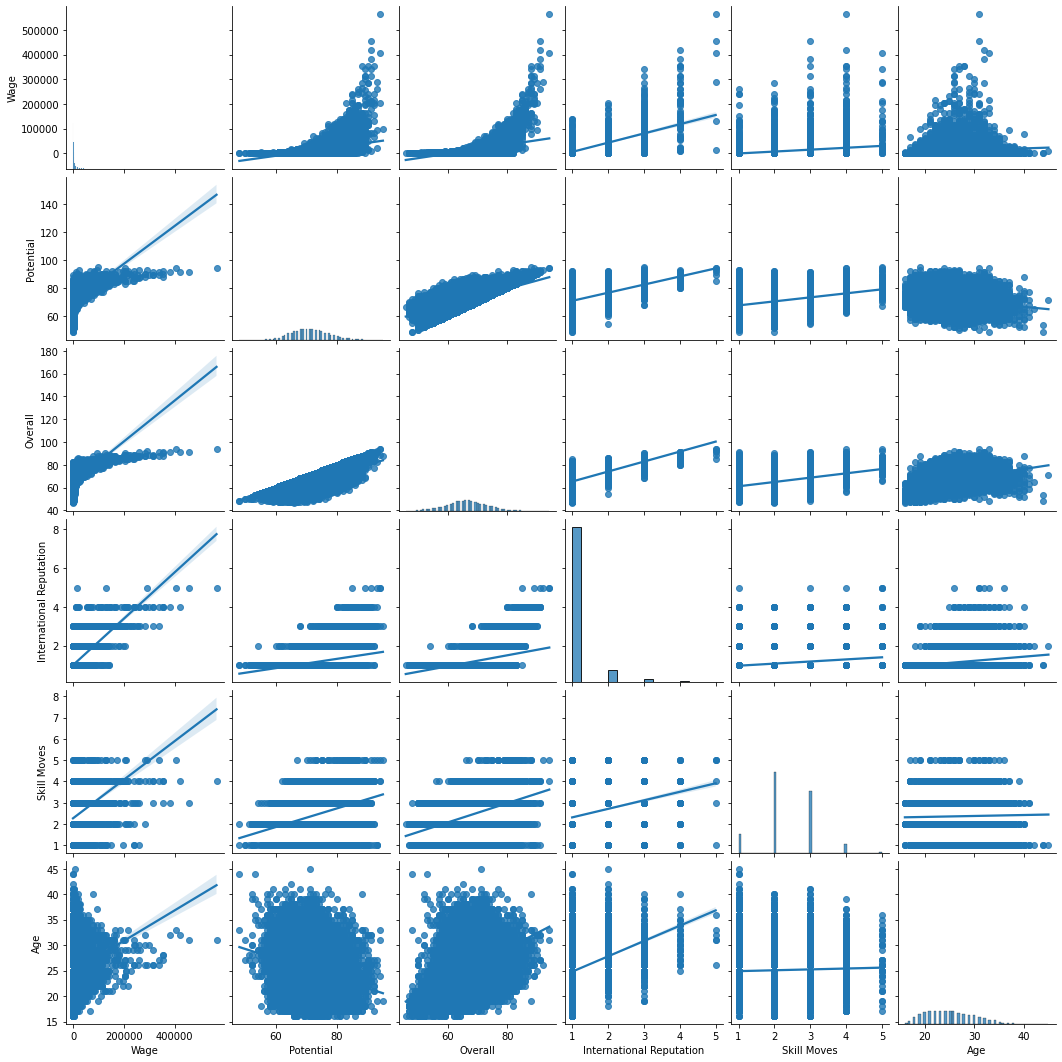

In [207]:
df_pairplot = fifa_var_df[['Wage','Potential','Overall','International Reputation','Skill Moves','Work Rate','Value','Age']]
df_pairplot['Wage'] = pd.to_numeric(df_pairplot['Wage']).fillna(0).astype(float)
sns.pairplot(df_pairplot, kind='reg')

plt.show()

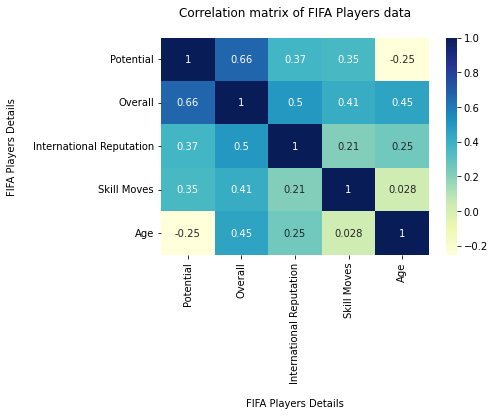

In [190]:
hm = sns.heatmap(df_pairplot.corr(), cmap="YlGnBu", annot=True)

hm.set(xlabel='\nFIFA Players Details', ylabel='FIFA Players Details\n', title = "Correlation matrix of FIFA Players data\n")

plt.show()

### - Age has least correlation with players wage
### - Current Value  of a player influence the wage of the player by 80-90%
### - Players with good Potential, Overall rating and international reputation gets better wage

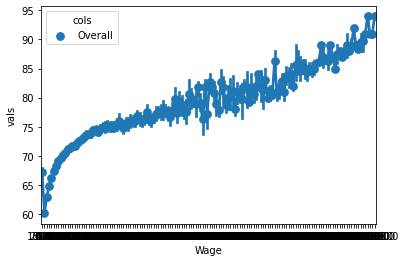

In [213]:
# Checking the single plot of Wage and Overall Rating of a player
df_Wage = pd.DataFrame(fifa_var_df[['Wage','Overall']])
df_Wage['Wage'] = pd.to_numeric(df_Wage['Wage']).fillna(0).astype(float)

dfm_Wage = df_Wage.melt('Wage', var_name='cols', value_name='vals')

g = sns.pointplot(x="Wage", y="vals", hue='cols', data=dfm_Wage)

#### 18. Find the position in the pitch where the maximum number of players play and the position where the minimum number of players play? Display it using a plot.

In [215]:
fifa_var_df.groupby(['Position'])['Position'].count().sort_values(ascending=False)

Position
ST     2212
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
LAM      21
RAM      21
RF       16
LF       15
Name: Position, dtype: int64

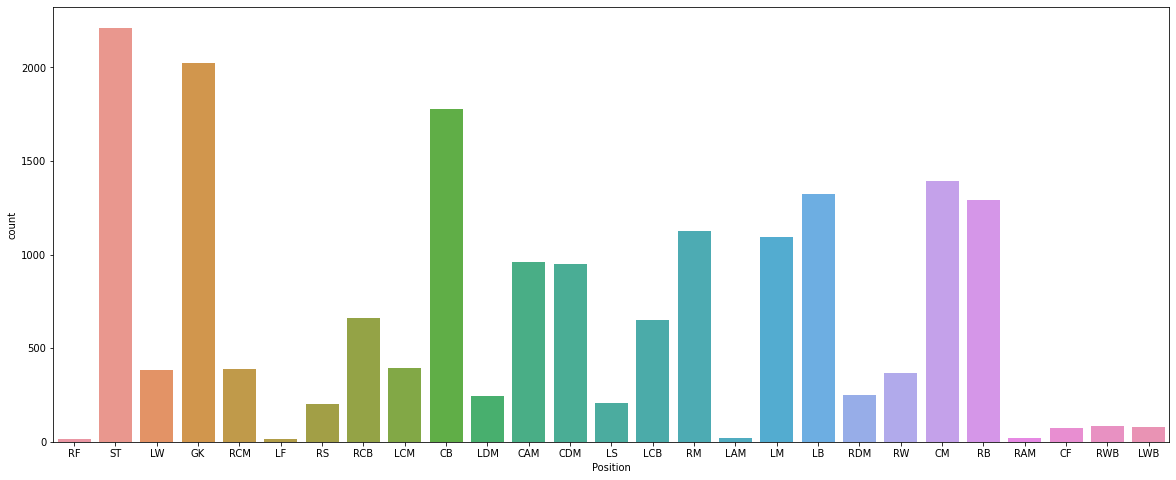

In [216]:
plt.figure(figsize =(20,8))
sns.countplot(x="Position", data =fifa_var_df)
plt.show()

### ST Position has maximum number of Players 2212

#### 19. How many players are from the club 'Juventus' and the wage is greater than 200K? Display all the information of such players.

In [220]:
fifa_df_juv200 = fifa_var_df[fifa_var_df['Club']=='Juventus']
fifa_df_juv200[fifa_df_juv200['Wage']>200000]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
15,211110,P. Dybala,24,Argentina,89,94,Juventus,89000000.0,205000.0,Left,...,84.0,23.0,20.0,20.0,5.0,4.0,4.0,5.0,8.0,153500000.0
24,138956,G. Chiellini,33,Italy,89,89,Juventus,27000000.0,215000.0,Left,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0


In [221]:
fifa_df_juv200[fifa_df_juv200['Wage']>200000]['Name'].count()

3

#### 20. Generate a data frame containing top 5 players by Overall rating for each unique position.

In [222]:
fifa_df_top5pos = fifa_var_df.groupby(['Position']).apply(lambda x: x.nlargest(5,['Overall'])).reset_index(drop=True)
fifa_df_top5pos

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,194765,A. Griezmann,27,France,89,90,Atlético Madrid,78000000.0,145000.0,Left,...,87.0,59.0,47.0,48.0,14.0,8.0,14.0,13.0,14.0,165800000.0
1,190460,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,73500000.0,205000.0,Right,...,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141500000.0
2,201942,Roberto Firmino,26,Brazil,86,87,Liverpool,53000000.0,195000.0,Right,...,87.0,60.0,64.0,42.0,8.0,11.0,9.0,6.0,10.0,104700000.0
3,189596,T. Müller,28,Germany,86,86,FC Bayern München,45000000.0,135000.0,Right,...,83.0,44.0,41.0,44.0,6.0,7.0,11.0,14.0,14.0,74300000.0
4,176635,M. Özil,29,Germany,86,86,Arsenal,43500000.0,190000.0,Left,...,82.0,24.0,16.0,19.0,6.0,14.0,10.0,6.0,14.0,82700000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
131,188545,R. Lewandowski,29,Poland,90,90,FC Bayern München,77000000.0,205000.0,Right,...,86.0,34.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,127100000.0
132,202126,H. Kane,24,England,89,91,Tottenham Hotspur,83500000.0,205000.0,Right,...,89.0,56.0,36.0,38.0,8.0,10.0,11.0,14.0,11.0,160700000.0
133,153079,S. Agüero,30,Argentina,89,89,Manchester City,64500000.0,300000.0,Right,...,90.0,30.0,20.0,12.0,13.0,15.0,6.0,11.0,14.0,119300000.0


#### 21. What is the average wage one can expect to pay for the top 5 players in every position?

In [224]:
fifa_df_top5pos.groupby('Position').apply(np.mean).reset_index()[['Position','Wage']]

,Position,Wage
0,CAM,174000.0
1,CB,139600.0
2,CDM,217000.0
3,CF,47400.0
4,CM,130600.0
5,GK,192800.0
6,LAM,81600.0
7,LB,177200.0
8,LCB,162000.0
9,LCM,184400.0


# Thank You
### Rough Work

In [160]:
fifa_var_df[fifa_var_df['Overall']==90].head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
9,200389,J. Oblak,25,Slovenia,90,93,Atlético Madrid,68000000.0,94000.0,Right,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,144500000.0
10,188545,R. Lewandowski,29,Poland,90,90,FC Bayern München,77000000.0,205000.0,Right,...,86.0,34.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,127100000.0
11,182521,T. Kroos,28,Germany,90,90,Real Madrid,76500000.0,355000.0,Right,...,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,156800000.0
12,182493,D. Godín,32,Uruguay,90,90,Atlético Madrid,44000000.0,125000.0,Right,...,82.0,90.0,89.0,89.0,6.0,8.0,15.0,5.0,15.0,90200000.0
13,168542,David Silva,32,Spain,90,90,Manchester City,60000000.0,285000.0,Left,...,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111000000.0


In [223]:
fifa_var_df2 = fifa_var_df.copy()